# IMPORT

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# FUNGSI DETEKSI GARIS

In [23]:
def detect_orange_lines(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    orange_lower = np.array([0, 50, 50])
    orange_upper = np.array([30, 255, 255])

    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)

    kernel = np.ones((5, 5), np.uint8)
    orange_mask = cv2.morphologyEx(orange_mask, cv2.MORPH_OPEN, kernel)

    edges = cv2.Canny(orange_mask, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    return image

# MEMBACA GAMBAR

In [24]:
image = cv2.imread('6.jpg')

# DUPLIKASI GAMBAR TAMPILAN ASLI DAN RESULT

In [25]:
original_image = image.copy()
result = image.copy()

# DETEKSI GARIS PD GAMBAR

In [26]:
result = detect_orange_lines(result)

# UBAH WARNA DARI BGR KE RGB

In [27]:
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# OUTPUT GAMBAR ASLI DAN HASIL DETEKSI

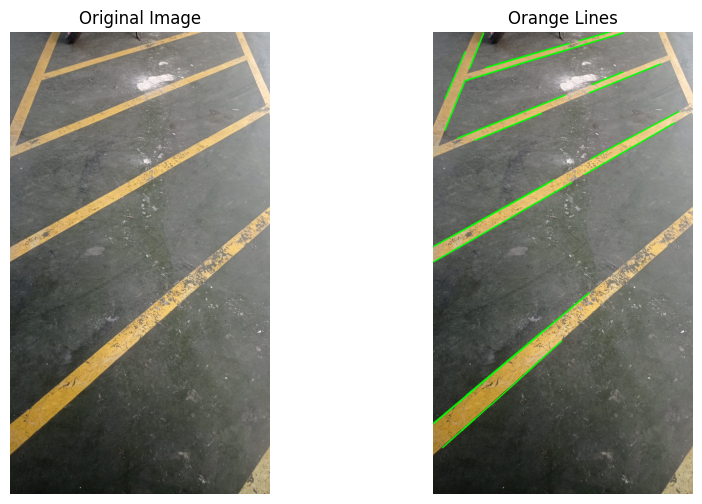

In [28]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Orange Lines')
plt.axis('off')

plt.show()